In [11]:
# 데이터 준비
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://bit.ly/perch_csv_data') # pandas는 csv 파일을 읽어 올 수 있다.
perch_full = df.to_numpy() # numpy로 쉽게 변환 가능

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)


In [12]:
# 사이킷런의 변환기
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False) # 자동으로 특성에 절편이 추가되나 사이킷런에서는 이를 무시해주므로 안 써도 무방
poly.fit([[2,3]]) # fit()에서는 새롭게 만들 특정 조합을 찾는다. (default = 각 특성을 제곱한 항과 특성끼리 곱한 항 추가)
print(poly.transform([[2,3]])) # transform()에서는 실제 데이터로 변환.

[[2. 3. 4. 6. 9.]]


In [13]:
# 데이터에 적용
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(poly.get_feature_names())# 9개의 특성이 어떻게 만들어졌는지 확인하는 방법

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


In [14]:
# 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target), lr.score(test_poly, test_target)) 
# 과소적합 문제해결

0.9903183436982124 0.9714559911594202


In [15]:
# 특성의 개수를 추가할 시
poly = PolynomialFeatures(degree=5, include_bias= False) # degree= 고차항의 최대 차수 지정, degree=5 : 5차까지
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target), lr.score(test_poly, test_target))
# 훈련 세트에 과대적합됨

0.999999999997514 -144.4019658575197


In [16]:
# 규제 전 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


In [17]:
# 릿지 회귀 : 계수를 제곱한 값을 기준으로 규제
# 라쏘 회귀 : 계수의 절댓값을 기준으로 규제

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target) ,ridge.score(test_scaled, test_target))

0.9896101671037343 0.9790693977615383


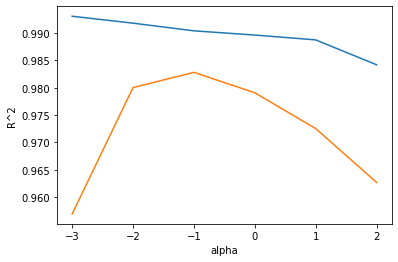

In [18]:
# alpha 매개변수: 릿지와 라쏘 사용 시 조절 가능한 규제의 양
# 훈련 세트와 테스트 세트의 점수가 가장 가까운 곳이 최적의 alpha 값
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 최적의 알파값 = 0.1

In [19]:
# 최적의 알파값에서 릿지 모델 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target))

0.9903815817570369 0.9827976465387016


0.989789897208096 0.9800593698421886


C:\Users\CRACKID\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.69795779601, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\CRACKID\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345409666, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


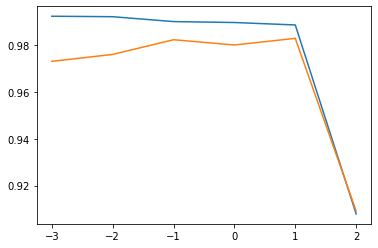

In [27]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target))

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)

    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show()

In [29]:
# 최적의 알파값에서 라쏘 모델 훈련
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target))

0.9888067471131867 0.9824470598706695


In [30]:
# 계수가 0인 라쏘 모델 
print(np.sum(lasso.coef_ == 0))

40
